<a href="https://colab.research.google.com/github/arj442/Practice/blob/main/Classification%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Introduction

The financial sector is one of the leading industries that widely recognise the application of data science to make processes and decisions quicker and more efficient. This dataset explores the everyday challenge that the industry has in loan eligibility and the impact different variables will have on the decision.

Problem:

The objective is to develop an automated, real-time loan eligibility system on customer information provided during their application. The necessary details include Gender, marital status, education, number of dependencies, income, etc. In addition, a partial dataset has been provided, to identify customer segments that qualify for loans.


| Column             | Description                                              | Example Encoding                      |
|--------------------|----------------------------------------------------------|---------------------------------------|
| Loan_ID            | Unique identifier for each loan application              | numeric                               |
| Gender             | Gender of the applicant                                  | 1 for Male, 2 for Female              |
| Married            | Whether the applicant is married                         | 1 for Yes, 0 for No                   |
| Dependents         | Number of dependents the applicant has                   | 0, 1, 2, 3                            |
| Graduate           | Whether the applicant is a graduate                      | 1 for Yes, 0 for No                   |
| Self_Employed      | Whether the applicant is self-employed                   | 1 for Yes, 0 for No                   |
| ApplicantIncome    | Total income of the applicant                            | numeric                               |
| CoapplicantIncome  | Total income of the co-applicant                         | numeric                               |
| LoanAmount         | Loan amount requested by the applicant                   | numeric                               |
| Loan_Amount_Term   | Loan term in months                                      | numeric                               |
| Credit_History     | Whether the applicant has a credit history               | 1 for Yes, 0 for No                   |
| Property_Area      | Area where the property is located                       | 1 for Urban, 2 for Semiurban, 3 for Rural |
| Loan_Status        | Status of the loan application                           | Y for Approved, N for Rejected        |

#2) Imports of Libaries and Helper Functions


The next step is to install the different packages and libraries to help with each model build step.

This includes Pandas/ Numpy to be used for exploratory data analysis, matplotlib/seaborn for visualisation and several different libraries from the Sklearn package.

In [ ]:
!pip install sklearn
!pip install tabula-py
!pip install pandas
!pip install pandas-profiling
import pandas as pd
import numpy as np
from google.colab import files
from google.colab import drive
from pandas_profiling import ProfileReport
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import tabula as tb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#3) Data Ingestion

The next step is to ingest the loan records from the ERP database and an excel document maintained by the sales team.

The following way to load both sets of data will be used to import the data into google colab.

from google.colab import files and uploaded = files.upload()

Uploading data from a local computer, offers additional data security which will mean that only authroized individuals will access the notebook can view the data. Lastly large datasets can be difficult to manage locally, but Google Colab provides a centralized platform where users can access, analyze, and store data in a secure and organized way.

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Loans_Database_Table.pdf to Loans_Database_Table (2).pdf


In [ ]:
# load our pdf
path = 'Loans_Database_Table.pdf'

# Load the tables from the PDF file into a list of DataFrames
dfs = tb.read_pdf(path, output_format='dataframe',
                          pages="all", multiple_tables=False)

# add additional column to show source of data
for df in dfs:
    df['DataSource'] = 'ERP Database'

# print dataframes
for df_LDTPDF in dfs: print(df_LDTPDF.head())

print(df_LDTPDF.head())

   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     1002       1        0           0         1              0   
1     1003       1        1           1         1              0   
2     1005       1        1           0         1              1   
3     1006       1        1           0         0              0   
4     1008       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Property_Area Loan_Status    DataSource  
0               1              1           Y  ERP Database  
1               1              3          

In [ ]:
#upload the execl file, which is maintained by the sales team.
from google.colab import files


uploaded = files.upload()

Saving Zappy Loan Data.xlsx to Zappy Loan Data (2).xlsx


In [ ]:
file = ('/content/Zappy Loan Data.xlsx')

df_LDTCSV = pd.read_excel(file)
df_LDTCSV=df_LDTCSV.assign(DataSource='Sales Team')

df_LDTCSV.head()

Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
4     2297       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
4             2500            20000.0         103               333   

   Credit_History  Property_Area Loan_Status  DataSource  
0               1              3           Y  Sales Team  
1               0              2           N  Sales Team  
2               0              1           N  Sales Team  
3               1              3           N  Sales Team  
4               1              2           Y  Sales Team

In [ ]:
df_Complete_Loans_Database_Table= [df_LDTCSV,df_LDTPDF]

In [ ]:
df_Complete_Loans_Database_Table= pd.concat(df_Complete_Loans_Database_Table)

# 4) Data Quality- Preparing and Cleaning Data


Data quality is one of the critical processes in building any predictive model. Ensuring high data quality allows for improved accuracy and reliability of the model produced.

Ramzan et al. (2021) highlight the need for data preprocessing and cleaning using Python libraries such as Pandas and Scikit-learn to ensure high-quality data for machine learning applications.

The following steps will cover the data quality dimensions to ensure high data quality:

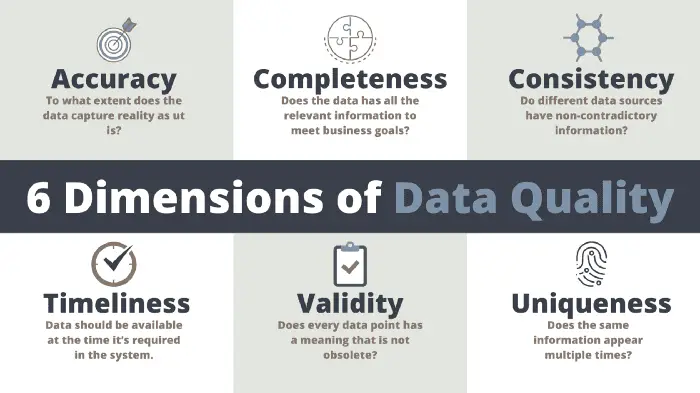

#Data Quality- Uniqueness

This is to check if there is information that appears multiple times.

In [ ]:
#check if there is any duplicate loan entries.
df_Complete_Loans_Database_Table['Loan_ID'].is_unique

False

The above highlights that there are duplicated loan IDs in the combined dataset. The duplicate Loan IDs that will be removed are the entries from the Sales Team. With this being maintained by the Sales team, this increases the chance of duplication and missing values. With the ERP data being loaded second, that is the reason why the last loan entry has been kept.

In [ ]:
#removal of  the duplicate records
df_Complete_Loans_Database_Table.drop_duplicates(subset=('Loan_ID'), keep='last', inplace=True)

In [ ]:
# with duplicates now, the data will be re-indexed on Loan ID
Complete_Loans_Database_Table = df_Complete_Loans_Database_Table.set_index('Loan_ID')

# Data Quality- Profiling

The next step in the quality checks is to remove check for any missing data. Baumer et al. (2020) emphaises doing this before any other quality checks. WIth the below infomation showing their is no missing data points from the table data sources ingested.

In [ ]:
df_Complete_Loans_Database_Table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 397
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Graduate           614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
 13  DataSource         614 non-null    object 
dtypes: float64(1), int64(11), object(2)
memory usage: 72.0+ KB


# Data Quality- Validation

In [ ]:
# data validation on the data dictionary
from pydantic import BaseModel, Field, conint, condecimal, constr

class LoanApplication(BaseModel):
    Loan_ID: int
    Gender: conint(ge=1, le=2)
    Married: conint(ge=0, le=1)
    Dependents: conint(ge=0, le=3)
    Graduate: conint(ge=0, le=1)
    Self_Employed: conint(ge=0, le=1)
    ApplicantIncome: condecimal(ge=0)
    CoapplicantIncome: condecimal(ge=0)
    LoanAmount: condecimal(ge=0)
    Loan_Amount_Term: condecimal(ge=0)
    Credit_History: conint(ge=0, le=1)
    Property_Area: conint(ge=1, le=3)
    Loan_Status: constr(regex="^[YN]$")

# Sample loan application data
loandata = {
    "Loan_ID": 567085,
    "Gender": 1,
    "Married": 0,
    "Dependents": 1,
    "Graduate": 0,
    "Self_Employed": 0,
    "ApplicantIncome": 4000,
    "CoapplicantIncome": 6000,
    "LoanAmount": 100000,
    "Loan_Amount_Term": 2700,
    "Credit_History": 1,
    "Property_Area": 2,
    "Loan_Status": "Y"
}

# Validate the data using the LoanApplication Pydantic model
Complete_Loans_Database_Table1 = LoanApplication(**loandata)

print(Complete_Loans_Database_Table1)


Loan_ID=567085 Gender=1 Married=0 Dependents=1 Graduate=0 Self_Employed=0 ApplicantIncome=Decimal('4000') CoapplicantIncome=Decimal('6000') LoanAmount=Decimal('100000') Loan_Amount_Term=Decimal('2700') Credit_History=1 Property_Area=2 Loan_Status='Y'


# 5) EDA - Exploratory data analysis

In [ ]:
Complete_Loans_Database_Table_Report=ProfileReport(df_Complete_Loans_Database_Table)
Complete_Loans_Database_Table_Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

LoanAmount contains outliers, so will have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often significantly impacts the mean and standard deviation, affecting the distribution. Therefore, we must take steps to remove outliers from our data sets.

Log transformations are often used in statistical analysis to reduce the impact of extreme values or outliers and to normalize the distribution of data. This will be completed when the dataset has been split.

To calculate the average loan i used the following python function. .value_counts(normalize=True). Which is a method that can be applied to a Pandas DataFrame or Series object to obtain the count of unique values and their respective frequencies as a new Series object. I then placed the varied i am looking for as a filter, to give me the % of Loans that were successful.

In [ ]:
# On average 69% of loans are approved
df_Complete_Loans_Database_Table['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

#Categorical Analysis

To look at the different ctaegorical variables i will be using the following matplotlib to provide a graphical distrubtion of the variables. The first function will look at the Complete loan database dataframe, and provide a count of the genders. The data is the nomalised into a % and then plotted on a bar graph which is 20:10 big.

The same process then will be repeated for the Married/ Credit History and Graduates variables.

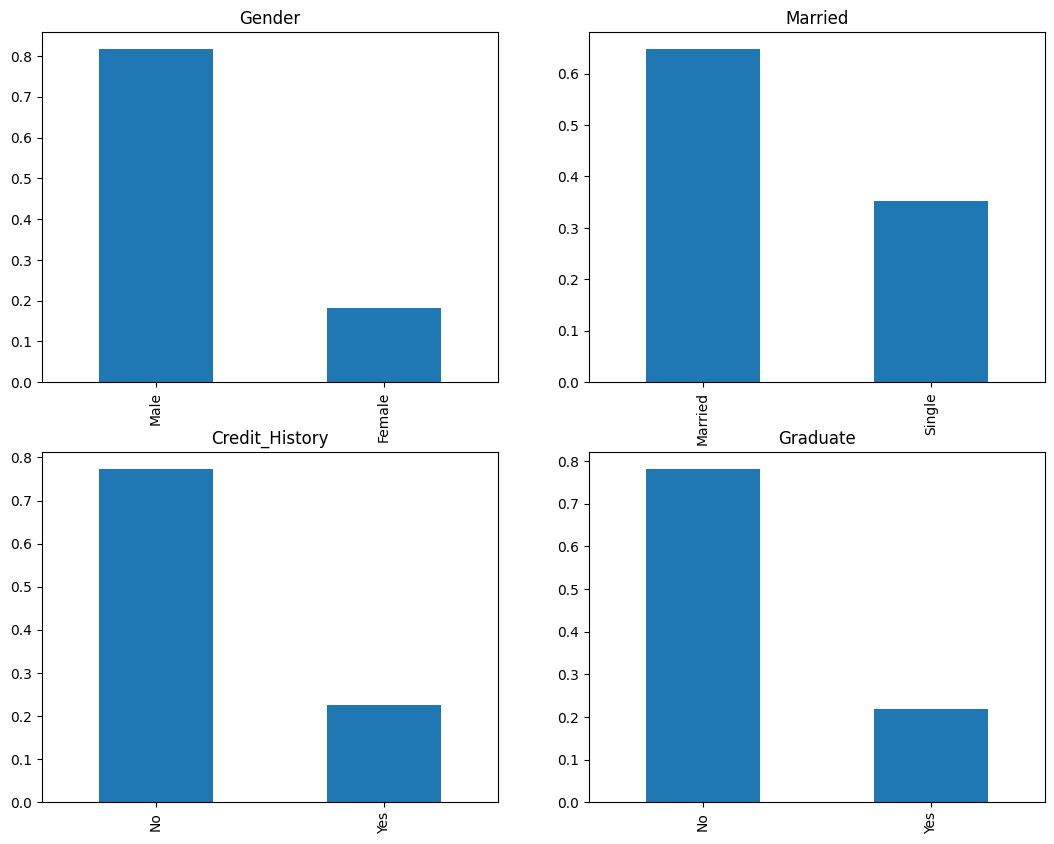

In [ ]:
ax=plt.subplot(231)
df_Complete_Loans_Database_Table['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
ax.set_xticklabels(['Male', 'Female'])

ax2=plt.subplot(232)
df_Complete_Loans_Database_Table['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
ax2.set_xticklabels(['Married', 'Single'])

ax3=plt.subplot(234)
df_Complete_Loans_Database_Table['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
ax3.set_xticklabels(['No', 'Yes'])

ax4=plt.subplot(235)
df_Complete_Loans_Database_Table['Graduate'].value_counts(normalize=True).plot.bar(title= 'Graduate')
ax4.set_xticklabels(['No', 'Yes'])

plt.show()

It can be inferred from the above bar plots that:

*   80% applicants in the dataset are male.
*   65% of the applicants in the dataset are married.
*   75% applicants have credit history (repaid their debts).
*   80% of the applicants are Graduate.

#Independent Variable (Ordinal)
The same process that was used for the categorical variables, will be used to anaylse the independant variables Number of Dependant and Property Areas.

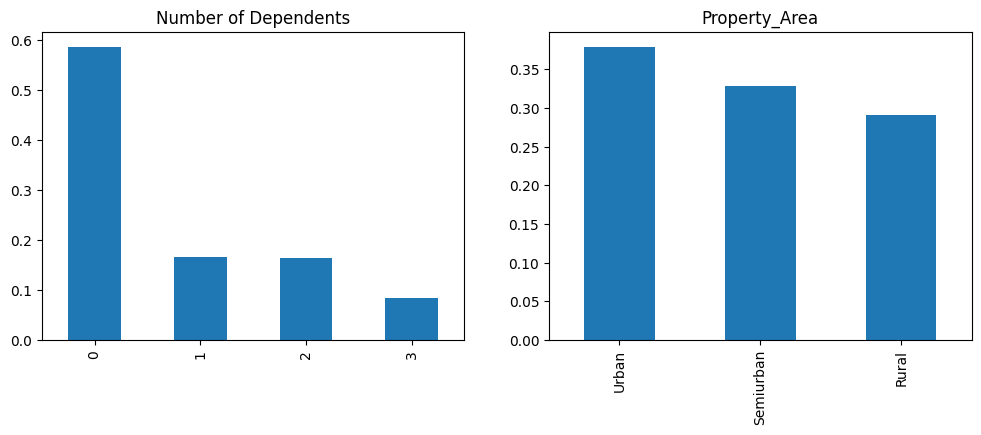

In [ ]:
plt.subplot(121)
df_Complete_Loans_Database_Table['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Number of Dependents')

ax5=plt.subplot(122)
df_Complete_Loans_Database_Table['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
ax5.set_xticklabels(['Urban', 'Semiurban','Rural'])
plt.show()

Following inferences can be made from the above bar plots:

*   More than half of the applicants don’t have any dependents.
*   Most of the applicants are from Semiurban area.

Loan_Status    N    Y
Gender               
1            155  347
2             37   75


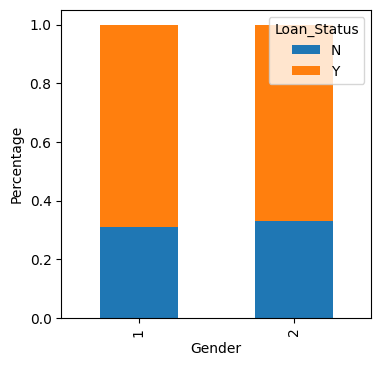

In [ ]:
# 67% of females loans are approved vs 69% of males
print(pd.crosstab(df_Complete_Loans_Database_Table['Gender'],df_Complete_Loans_Database_Table['Loan_Status']))
Gender = pd.crosstab(df_Complete_Loans_Database_Table['Gender'],df_Complete_Loans_Database_Table['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

In [ ]:
#The average income of all applicants- The average of all applicates income in $5403
statistics.mean(df_Complete_Loans_Database_Table.ApplicantIncome)

5403.459283387622

Loan_Status    N    Y
Graduate             
0             52   82
1            140  340


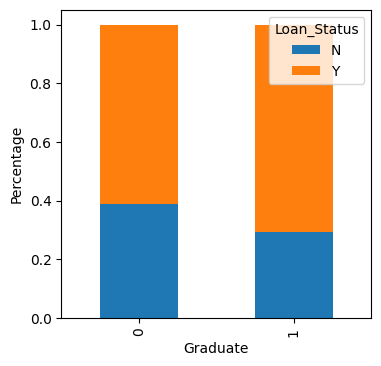

In [ ]:
# 71% of graduates have their loan approved
print(pd.crosstab(df_Complete_Loans_Database_Table['Graduate'],df_Complete_Loans_Database_Table['Loan_Status']))
Gender = pd.crosstab(df_Complete_Loans_Database_Table['Graduate'],df_Complete_Loans_Database_Table['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Graduate')
p = plt.ylabel('Percentage')

In [ ]:
# The average income of graduates that have applied for a loan is $5857
GraduateAvgIncome = df_Complete_Loans_Database_Table.groupby(['Graduate'])['ApplicantIncome'].apply(list).apply(statistics.mean)
print(GraduateAvgIncome)

Graduate
0    3777.283582
1    5857.433333
Name: ApplicantIncome, dtype: float64


In [ ]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
df_Complete_Loans_Database_Table['LoanAmount_bin'] = pd.cut(df_Complete_Loans_Database_Table['LoanAmount'],bins,labels=group)

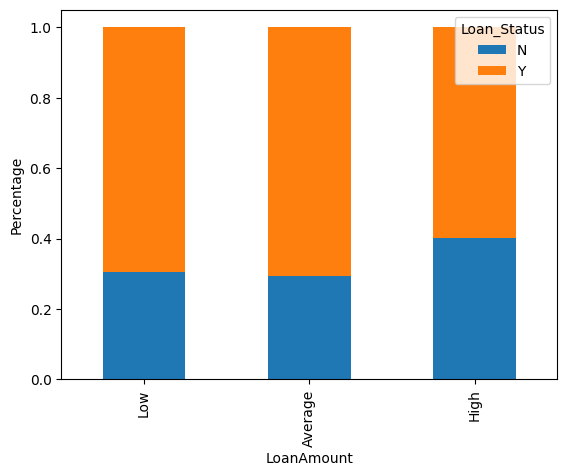

In [ ]:
# Group Loan amounts together into high/ medium/ low.
LoanAmount_bin = pd.crosstab(df_Complete_Loans_Database_Table['LoanAmount_bin'],df_Complete_Loans_Database_Table['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

The proportion of approved loans is higher for Low and Average Loan Amounts than for High Loan Amounts. This suggests a hypothesis that there is a higher chance of being approved for a small loan amount.

#Treatment of Outliers
As we saw earlier in pandas profile analysis, LoanAmount contains outliers, so we have to treat them as the presence of outliers affects the data distribution. Having outliers in the dataset often significantly impacts the mean whilst affecting the distribution. Therefore, we must take steps to remove outliers from our data sets.
Most of the loan amount data sits to the left, which has caused a positive skewness to the data. How we will remove this skewness is through log transformation. This will not affect the smaller values but reduce, the larger ones, so we get a similar distribution.

Text(0.5, 1.0, 'Complete_Loans_Database_Table')

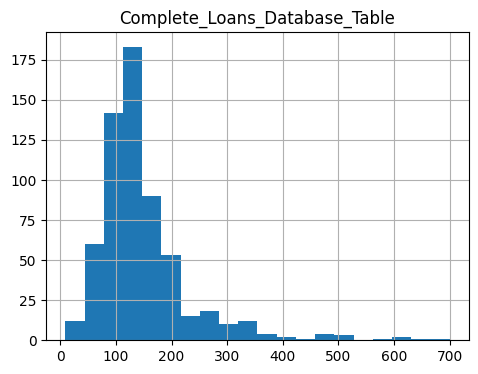

In [ ]:
# before log transformation
ax1 = plt.subplot(121)
df_Complete_Loans_Database_Table['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Complete_Loans_Database_Table")

In [ ]:
#Removing skewness in LoanAmount variable by log transformation
df_Complete_Loans_Database_Table['LoanAmount_log'] = np.log(df_Complete_Loans_Database_Table['LoanAmount'])

Text(0.5, 1.0, 'Complete_Loans_Database_Table')

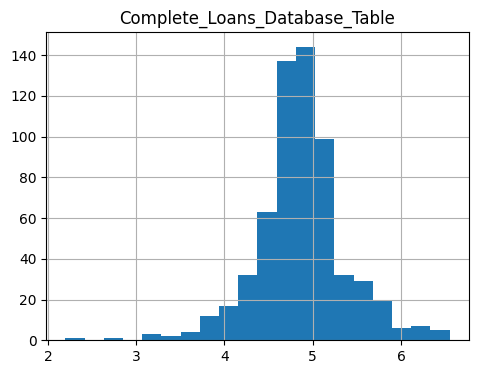

In [ ]:
# after log transformation
ax1 = plt.subplot(121)
df_Complete_Loans_Database_Table['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Complete_Loans_Database_Table")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.


#Ethical and Regulatiitive implications of data decisions

It is critical to make sure the correct data is used in making decisions, as this could have ethical and regulative impacts. The use of data in decision-making is regulated by laws such as GDPR in the EU. Organisations must comply with these regulations to protect the privacy of individuals to avoid legal and financial penalties.

When choosing points for decision-making, you also need to consider the fairness and bias they may cause. For example, a decision point could disproportionally affect certain groups if data is used in bias.

#6) Predictions for Future Loan Applications

Before a predictive model can be built, we will perform feature engineering on the dataset and additional transformations. The following features will be added.
* Encode Loan_Status= The first change will be to encode the Loan Status to a numerical value, which is required for the predictive model we will build.
* Additional Features-There will be two additional features to impact the loan status.
1.	 Total Income - As discussed during the EDA analysis, we will combine the Applicant Income and Coapplicant Income. If the total income is high, the chances of loan approval might also be increased.
2.	Equated Monthly Installment - EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind this variable is that people with high EMIs might need help to repay the loan. We can calculate the EMI by taking the ratio of loan amount concerning loan amount term.


In [ ]:
# Encode the loan status as 1-0
lb=LabelEncoder()
df_Complete_Loans_Database_Table['LoanStatus2'] =lb.fit_transform(df_Complete_Loans_Database_Table['Loan_Status'])

In [ ]:
df_Complete_Loans_Database_Table

Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0       2284       1        0           0         0              0   
1       2287       2        0           0         1              0   
2       2288       1        1           2         0              0   
3       2296       1        0           0         0              0   
4       2297       1        0           0         1              0   
..       ...     ...      ...         ...       ...            ...   
393     2265       1        1           2         0              0   
394     2266       1        1           2         1              0   
395     2272       1        1           2         1              0   
396     2277       2        0           0         1              0   
397     2281       1        1           0         1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               3902             1666.0         109               333   
1               1500             1800.0         103               333   
2               2889                0.0          45               180   
3               2755                0.0          65               300   
4               2500            20000.0         103               333   
..               ...                ...         ...               ...   
393             1993             1625.0         113               180   
394             3100             1400.0         113               360   
395             3276              484.0         135               360   
396             3180                0.0          71               360   
397             3033             1459.0          95               360   

     Credit_History  Property_Area Loan_Status    DataSource LoanAmount_bin  \
0                 1              3           Y    Sales Team        Average   
1                 0              2           N    Sales Team        Average   
2                 0              1           N    Sales Team            Low   
3                 1              3           N    Sales Team            Low   
4                 1              2           Y    Sales Team        Average   
..              ...            ...         ...           ...            ...   
393               1              2           Y  ERP Database        Average   
394               1              1           Y  ERP Database        Average   
395               0              2           Y  ERP Database        Average   
396               0              1           N  ERP Database            Low   
397               1              1           Y  ERP Database            Low   

     LoanAmount_log  LoanStatus2  
0          4.691348            1  
1          4.634729            0  
2          3.806662            0  
3          4.174387            0  
4          4.634729            1  
..              ...          ...  
393        4.727388            1  
394        4.727388            1  
395        4.905275            1  
396        4.262680            0  
397        4.553877            1  

[614 rows x 17 columns]

#Feature Engineering


In [ ]:
# combine Applicant Income and Coapplicant Income into a new variable
df_Complete_Loans_Database_Table['Total_Income'] = df_Complete_Loans_Database_Table['ApplicantIncome'] + df_Complete_Loans_Database_Table['CoapplicantIncome']

<ipython-input-42-1b192884d53d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Complete_Loans_Database_Table['Total_Income'])


<AxesSubplot: xlabel='Total_Income', ylabel='Density'>

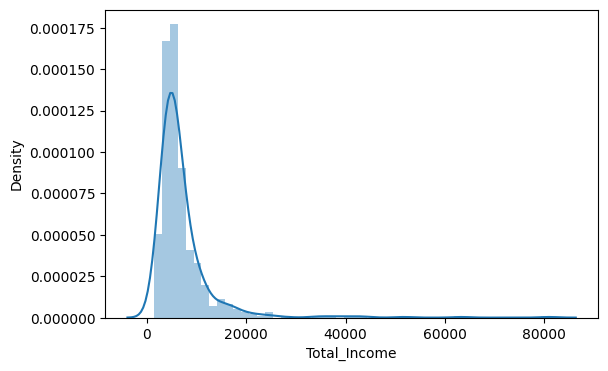

In [ ]:
# check the distribution of Total Income and then perform log transformation to normalise the dataset.

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(df_Complete_Loans_Database_Table['Total_Income'])


We can see Total Income is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

In [ ]:
# log transformation
df_Complete_Loans_Database_Table['Total_Income_log'] = np.log(df_Complete_Loans_Database_Table['Total_Income'])

<ipython-input-44-325e42fabd16>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Complete_Loans_Database_Table['Total_Income_log'])


Text(0.5, 1.0, 'Total_Income_Log')

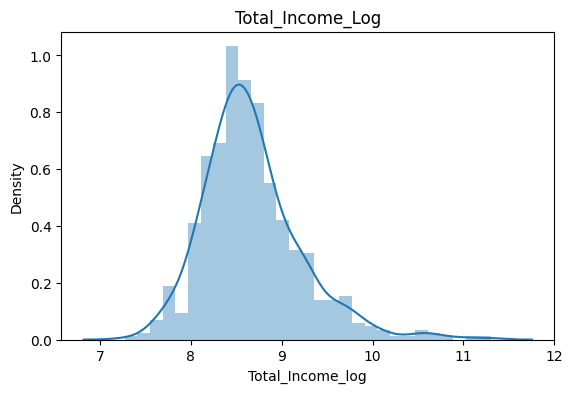

In [ ]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(df_Complete_Loans_Database_Table['Total_Income_log'])
ax1.set_title("Total_Income_Log")

In [ ]:
# create EMI feature
df_Complete_Loans_Database_Table['EMI'] = df_Complete_Loans_Database_Table['LoanAmount'] / df_Complete_Loans_Database_Table['Loan_Amount_Term']

<ipython-input-46-c47ecf82deb0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Complete_Loans_Database_Table['EMI'])


Text(0.5, 1.0, 'Equated Monthly Installment')

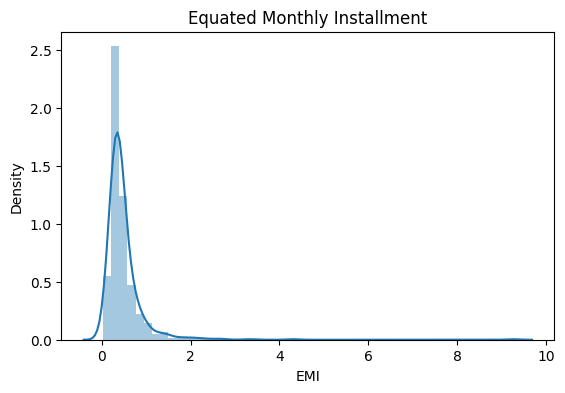

In [ ]:
# check the distribution of EMI
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(df_Complete_Loans_Database_Table['EMI'])
ax1.set_title("Equated Monthly Installment")

# Model Development/ Evaluation

In [ ]:
df_Complete_Loans_Database_Table = df_Complete_Loans_Database_Table.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','LoanAmount_bin','Loan_Status','DataSource'], axis=1)


With the data now ready to model, we will first split the data into Test and Train data. This will be done by using the train_test_split function from the sklearn.model_selection module to split the df_Complete_Loans_Database_Table dataframe into training and testing sets.

In [ ]:
df_train, df_test = train_test_split(df_Complete_Loans_Database_Table, test_size=0.3,
                                                    random_state=1234,
                                                    stratify=df_Complete_Loans_Database_Table[{'LoanStatus2','Gender','Credit_History','Graduate'}])

<ipython-input-76-e56ca3e3ccb4>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=df_Complete_Loans_Database_Table[{'LoanStatus2','Gender','Credit_History','Graduate'}])


In [ ]:
# check df_train
print(df_train.shape)
print(df_test.shape)

df_test.head()

(429, 13)
(185, 13)


Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
245     2984       1        1           2         1              0   
369     2191       1        1           0         1              0   
220     1736       1        1           0         1              0   
56      2362       1        1           1         1              0   
78      2429       1        1           1         1              1   

     Credit_History  Property_Area  LoanAmount_log  LoanStatus2  Total_Income  \
245               1              1        5.231109            1        7583.0   
369               1              3        6.345636            0       24996.0   
220               0              1        4.094345            0        2221.0   
56                0              1        4.700480            0        8917.0   
78                1              3        4.867534            1        4676.0   

     Total_Income_log       EMI  
245          8.933664  0.561562  
369         10.126471  1.583333  
220          7.705713  0.166667  
56           9.095715  0.229167  
78           8.450198  0.390390

The next step is to split the test into two seperate objects for test and train (X and Y). By doing this, we have separated the independent variables (features) from the dependent variable (target) in the training set. The X_train DataFrame will be used to train a machine learning model, while the y_train Series will be used as the target variable for the training.

In [ ]:
X_train = df_train.drop('LoanStatus2', axis=1)
y_train = df_train['LoanStatus2']

X_test = df_train.drop('LoanStatus2', axis=1)
y_test = df_train['LoanStatus2']


In [ ]:
# make prediction
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# make prediction
pred_cv = model.predict(X_test)

In [ ]:
# calculate accuracy score
accuracy_score(y_test, pred_cv)

0.7692307692307693

So our predictions are over 77% accurate, i.e. we have identified 77% of the loan status correctly.

In general, accuracy is a measure of how well the model is predicting the correct outcome, but it does not tell the whole story. We will now look at other metrics precision, recall and F1 score to perform the suitability of the model going forward.

[[ 66  69]
 [ 30 264]]


Text(50.722222222222214, 0.5, 'True')

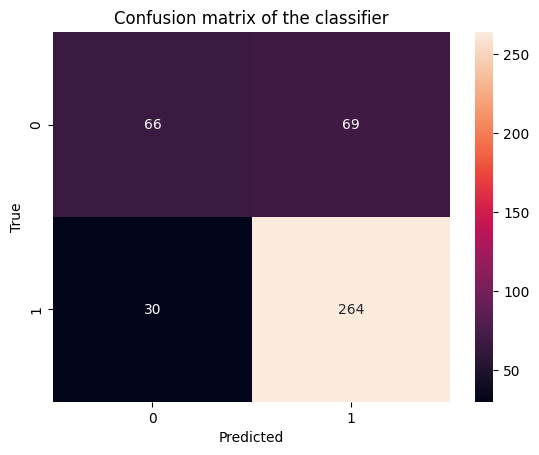

In [ ]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_cv))

              precision    recall  f1-score   support

           0       0.69      0.49      0.57       135
           1       0.79      0.90      0.84       294

    accuracy                           0.77       429
   macro avg       0.74      0.69      0.71       429
weighted avg       0.76      0.77      0.76       429



#7) Conclusion

Logistic Regression is often a good baseline that data scientists can use to provide a prediction in relation to Loan Approval. The model comes out with an accuracy of 77%, a precisions of 79% and recall of 90%.

To improve the accuracy of the model going forward their are a couple of recommendations that could be followed.


*   Use Cross Validation- Cross-validation is a technique that involves dividing the data into multiple subsets, training the model on some subsets, and testing it on the remaining subsets. This method can help to reduce overfitting and ensure that the model performs well on unseen data.
*   Compare with other models-  It is important to compare the performance of the logistic regression model with other models, such as decision trees, random forests, or neural networks. This can help to identify the best-performing model for the problem being solved.

Performing these additional techiques, will allow further development of the model and ensure it performs well against future data.
